---
title: "does order matter?"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

Let's say we want to take the derivative of a signal, but it is too rough, so some smoothing is required. Does the order of operations matter? Which should be done first? Smoothing or differentiation?

In [6]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# %matplotlib widget

In [7]:
#| code-summary: "load data"
filename = "dead_sea_1d.csv"
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [8]:
#| code-summary: "compute smoothing and derivatives"
df['grad_of_level'] = np.gradient(df['level'], 1.0)
df['smooth_of_level'] = df['level'].rolling('365D', center=True).mean()
df['grad_of_smooth_of_level'] = np.gradient(df['smooth_of_level'], 1.0)
df['smooth_of_grad_of_level'] = df['grad_of_level'].rolling('365D', center=True).mean()

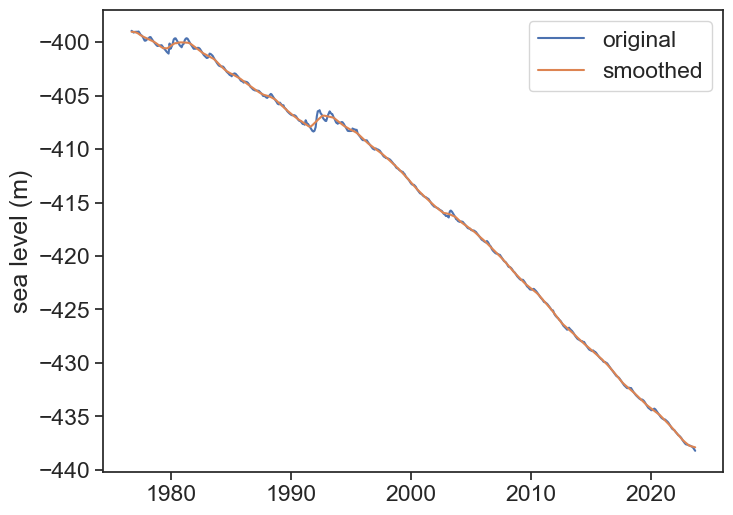

In [9]:
#| code-summary: "plot"
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(df['level'], label="original")
ax.plot(df['smooth_of_level'], label="smoothed")
ax.legend()
ax.set(ylabel="sea level (m)");

Now let's see the derivatives.

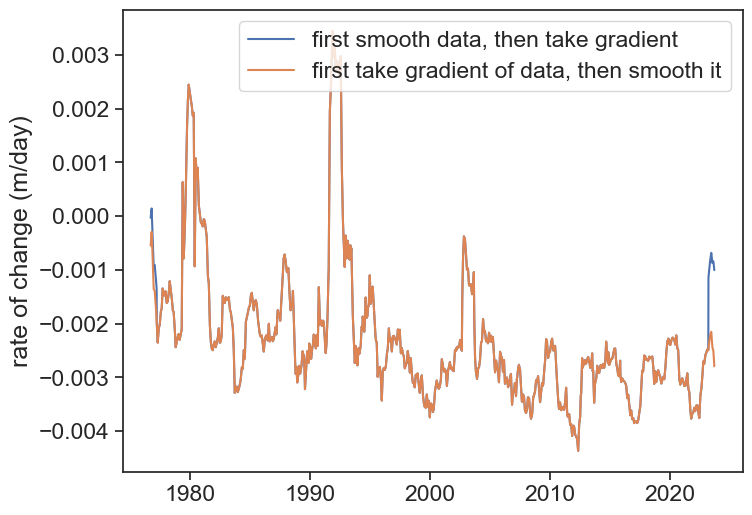

In [11]:
#| code-summary: "plot derivatives"
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(df['grad_of_smooth_of_level'], label="first smooth data, then take gradient")
ax.plot(df['smooth_of_grad_of_level'], label="first take gradient of data, then smooth it")
ax.legend()
ax.set(ylabel="rate of change (m/day)");